# Exercise 12.1

In the following exercise we define a Deep Neural Network (DNN) and train it to distinguish between different hand written digits, determining which one is which.  
To train it we use the database of hand-written digit images from MNIST (modified National Institute of Standard Technology) that contains $6000$ images of well centered digits.

## Parameters of DNN

Number of parameters aside, the great difference between this neural network and the one from exercise $12$ is related to the different kind of problems they are supposed to solve.  
This network has to accomplish a classification procedure, which means that the output must be an array of $10$ probabilities, that is to say numbers in the range $[0, 1)$. The answer given by the network is the digit corresponding to the highest probability.  
This means that the activation function of the output layer must be a softmax function, that is defined as:
$$
\sigma(\vec{z})_i = \frac{e^{z_i}}{\sum_{j=1}^N e^{z_j}}
\quad i=1,\dots,N \quad \vec{z}=\{ z_1, \dots, z_N\}
\text{,}$$

which turns any set of real numbers in a set of normalized probabilities. The more positive $z$ is, the higher the probability associated to that number.

### Optimizer

We try three different optimizers: stochastic gradient descent, Adam and Adagrad, and compare the resulting accuracies leaving the structure of the network unchanged.

### Loss function

As for the output layer's activation function, the loss function must be suitable for the categorization problem we're considering.  
That's why we use categorical crossentropy as a loss function.
It is defined as: $$=-\frac{1}{N}\sum_{i=1}^{N}\big(y_i^{out}\cdot\log(y_i^{lab})\big) \text{,}$$

where $\vec{y}^{out}$ and $\vec{y}^{lab}$ are in categorical form (arrays of all $0$ except for a single value which is $1$).
It is clear that such function returns very large values because of the diverging logarithms of $0$ if the $y_i^{out}$ is non-zero. It is therefore minimized when $\vec{y}^{out}=\vec{y}^{lab}$.

In [13]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
#import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [14]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


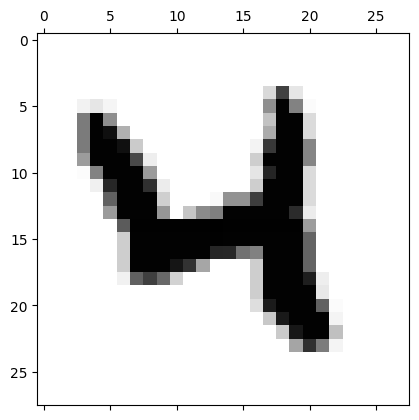

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [15]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

print('Model architecture created successfully!')

Model architecture created successfully!


## Using stochastic gradient descent as optimizer


In [17]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [18]:
# training parameters
batch_size = 32
epochs = 50

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/50
1875/1875 [==============================] - 11s 5ms/step - loss: 0.7570 - acc: 0.7757 - val_loss: 0.3163 - val_acc: 0.9133
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3848 - acc: 0.8897 - val_loss: 0.2411 - val_acc: 0.9308
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3116 - acc: 0.9116 - val_loss: 0.1997 - val_acc: 0.9425
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2676 - acc: 0.9256 - val_loss: 0.1776 - val_acc: 0.9467
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2366 - acc: 0.9341 - val_loss: 0.1601 - val_acc: 0.9506
Epoch 6/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2140 - acc: 0.9390 - val_loss: 0.1444 - val_acc: 0.9565
Epoch 7/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1935 - acc: 0.9452 - val_loss: 0.1314 - val_acc: 0.9590
Epoch 8/50
1875/1875 [==============================] -

313/313 [==============================] - 2s 7ms/step - loss: 0.0593 - acc: 0.9822

Test loss: 0.05929337069392204
Test accuracy: 0.982200026512146


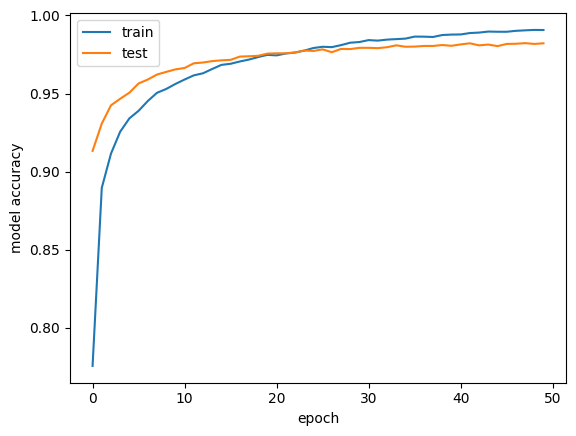

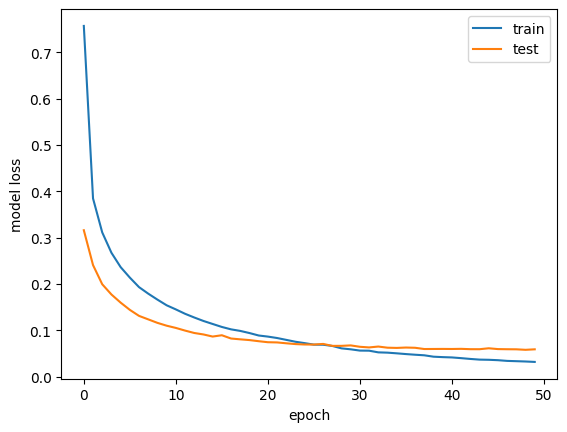

In [19]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 3s 7ms/step


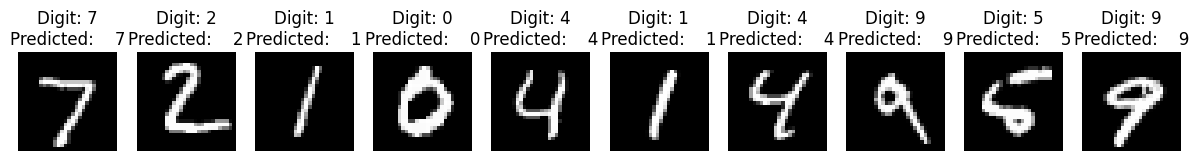

In [20]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off')
plt.show()

## Using Adam as optimizer


In [21]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
#X_train /= 255
#X_test /= 255

X_train shape: (60000, 784)
X_test shape: (10000, 784)



In [22]:
def compile_Adam():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [23]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_Adam= compile_Adam()

# train DNN and store training info in history
history = model_Adam.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2834 - acc: 0.9165 - val_loss: 0.1181 - val_acc: 0.9635
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1238 - acc: 0.9645 - val_loss: 0.0893 - val_acc: 0.9724
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0871 - acc: 0.9741 - val_loss: 0.0796 - val_acc: 0.9769
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0670 - acc: 0.9798 - val_loss: 0.0701 - val_acc: 0.9795
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0559 - acc: 0.9832 - val_loss: 0.0801 - val_acc: 0.9778
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0477 - acc: 0.9858 - val_loss: 0.0798 - val_acc: 0.9804
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0408 - acc: 0.9875 - val_loss: 0.0971 - val_acc: 0.9765
Epoch 8/20
1875/1875 [==============================] -

313/313 [==============================] - 1s 3ms/step - loss: 0.1376 - acc: 0.9809

Test loss: 0.1376221776008606
Test accuracy: 0.98089998960495


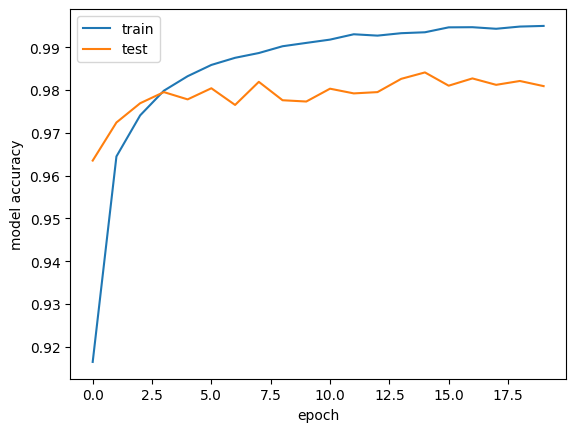

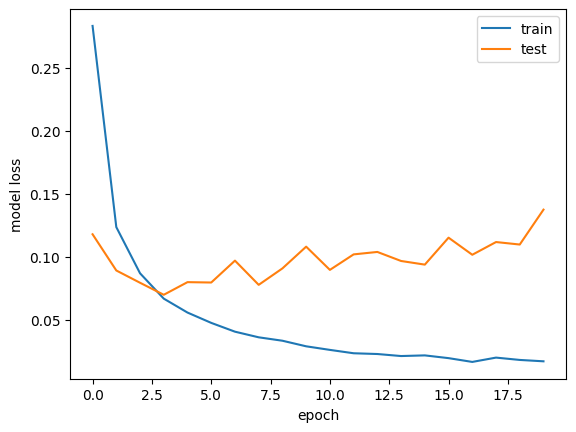

In [24]:
# evaluate model
score = model_Adam.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

The Adam optimizer seems to overlearn from the training sample, as the generalization error on the validation sample slightly increases from the $10^{th}$ epoch. Nonetheless, the prediction accuracy on validation sample is still 98%, as with stochastic gradient descent.

313/313 [==============================] - 1s 3ms/step


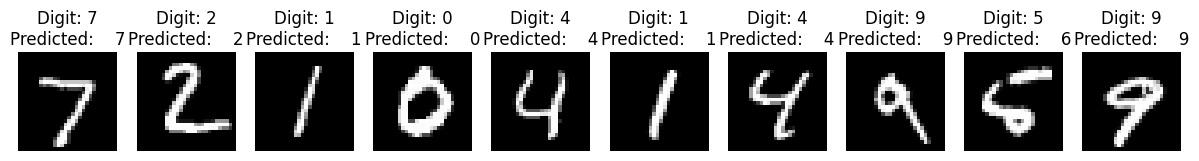

In [25]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_Adam.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off')
plt.show()

## Using Adagrad as optimizer

In [26]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
#X_train /= 255
#X_test /= 255
#print(X_train[0])

X_train shape: (60000, 784)
X_test shape: (10000, 784)



In [27]:
def compile_Adagrad():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [28]:
# training parameters
batch_size = 32
epochs = 50

# create the deep neural net
model_Adagrad= compile_Adagrad()

# train DNN and store training info in history
history = model_Adagrad.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/50
1875/1875 [==============================] - 13s 7ms/step - loss: 1.2899 - acc: 0.6209 - val_loss: 0.6084 - val_acc: 0.8710
Epoch 2/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6841 - acc: 0.8049 - val_loss: 0.4314 - val_acc: 0.8941
Epoch 3/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5634 - acc: 0.8393 - val_loss: 0.3709 - val_acc: 0.9037
Epoch 4/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4968 - acc: 0.8586 - val_loss: 0.3353 - val_acc: 0.9100
Epoch 5/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4628 - acc: 0.8683 - val_loss: 0.3151 - val_acc: 0.9146
Epoch 6/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4365 - acc: 0.8765 - val_loss: 0.2971 - val_acc: 0.9190
Epoch 7/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4153 - acc: 0.8817 - val_loss: 0.2840 - val_acc: 0.9225
Epoch 8/50
1875/1875 [==============================] -

313/313 [==============================] - 1s 3ms/step - loss: 0.1528 - acc: 0.9553

Test loss: 0.15280655026435852
Test accuracy: 0.955299973487854


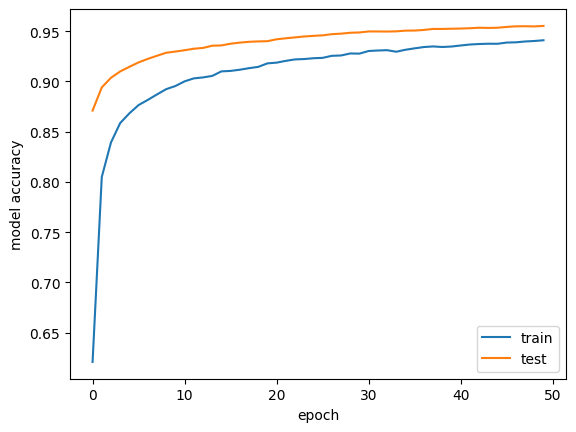

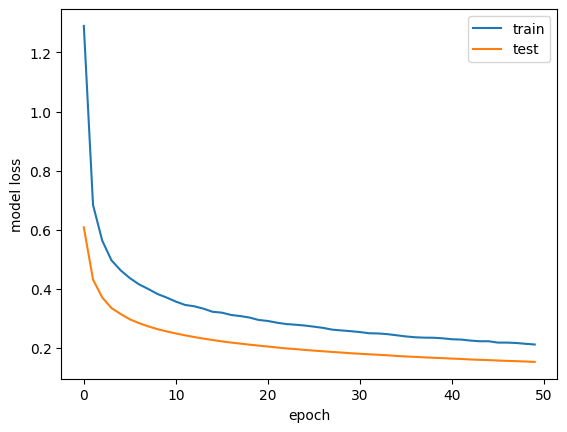

In [29]:
# evaluate model
score = model_Adagrad.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Adagrad has not the same overlaearning problem as Adam, but it's still not able to replicate the high accuracy given by stochastic gradient descent.

313/313 [==============================] - 1s 3ms/step


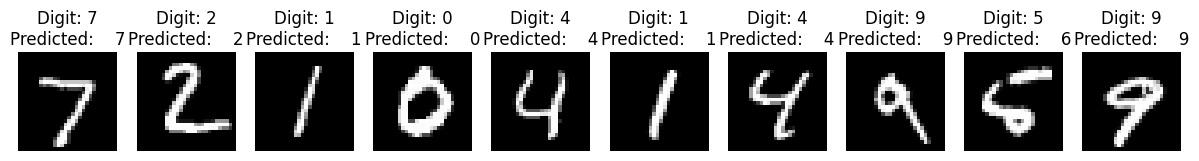

In [30]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_Adagrad.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off')
plt.show()

# Exercise 12.2

In this exercise we define a convolutional neural network (CNN), in order to solve the same classification problem as before in a more efficient way.

## Convolutional neural networks

CNNs are networks composed of convolutional layers, that is to say layers that apply a discrete convolution operation on the (2D) input, seen as a function of the position, with another function, called kernel.  
The kernel is a function that is different from $0$ only in a restricted domain, where it assumes values that are actually the parameters the network has to optimize in order to accomplish the requested task.  
CNNs are very useful in image processing, where the input is a function of the pixel's position. Such input function can have different channels, that correspond to the "degrees of freedom" of the input function.  
For example, in the full-colored image a cute cat every pixel has three channels, corresponding to three different values of Red, Green and Blue that correspond to that pixel. On the contrary, a black-and-white image of a nineteenth century snowball fight in the french countryside has only one channel, given by the value of brightness of the pixel.  
In this notebook we will be working with grey-scale images, which only have one channel.



In [ ]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


## Parameters of CNN

We design our CNN to have $7$ hidden layers.  
The first one is a convolutional layer with 6 filters and kernel of $5 \times 5$ dimension, activated by a reLU function.
The second one is a Dropout layer with probability $0.5$, in order to avoid overlearning, and the third one is a Max_Pooling with pooling size $2 \times 2$ that reduces the size of the input matrix.  
Then we add the same scheme again, with 8 convolutional filters the same size as the previous ones.
The seventh hidden layer, Flatten, is important because it converts the 2D input in a 1D string, making it compatble with the output layer, which is a dense layer of 10 neurons, each corresponding to a different digit, with softmax as activation function.

In [ ]:

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(6, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=( img_rows, img_cols, 1)))
    model.add(Dropout(0.5))
    # first maxpooling
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
    # second convolutional layer with 12 filters
    model.add(Conv2D(8, kernel_size=(5, 5),
                     activation='relu'))
    model.add(Dropout(0.5))
    # second max-pooling
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
    # flatten data
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    #
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ...
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    #

    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [ ]:
def compile_convo_model():
    # create the model
    model=create_CNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [ ]:
print(X_train.shape)

(60000, 28, 28, 1)


In [ ]:
# training parameters
batch_size = 32
epochs = 50

# create the deep neural net
model_CNN = compile_convo_model()

# train DNN and store training info in history
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.6004 - acc: 0.8027 - val_loss: 0.5046 - val_acc: 0.9459
Epoch 2/50
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2526 - acc: 0.9213 - val_loss: 0.3764 - val_acc: 0.9646
Epoch 3/50
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2076 - acc: 0.9352 - val_loss: 0.3236 - val_acc: 0.9697
Epoch 4/50
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1827 - acc: 0.9431 - val_loss: 0.2875 - val_acc: 0.9727
Epoch 5/50
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1691 - acc: 0.9468 - val_loss: 0.2699 - val_acc: 0.9746
Epoch 6/50
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1537 - acc: 0.9523 - val_loss: 0.2597 - val_acc: 0.9765
Epoch 7/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1450 - acc: 0.9552 - val_loss: 0.2257 - val_acc: 0.9789
Epoch 8/50
1875/1875 [==========================

313/313 [==============================] - 2s 6ms/step - loss: 0.1140 - acc: 0.9857

Test loss: 0.114033542573452
Test accuracy: 0.9857000112533569


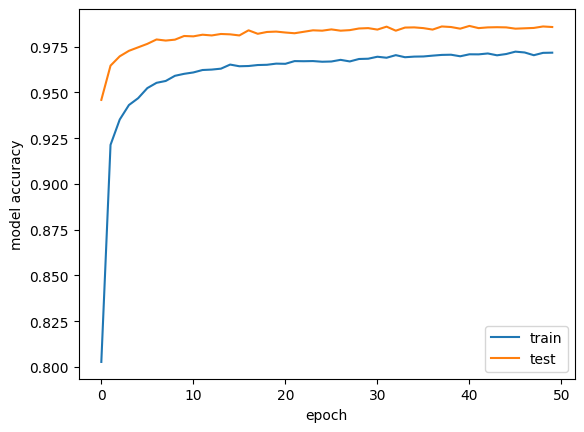

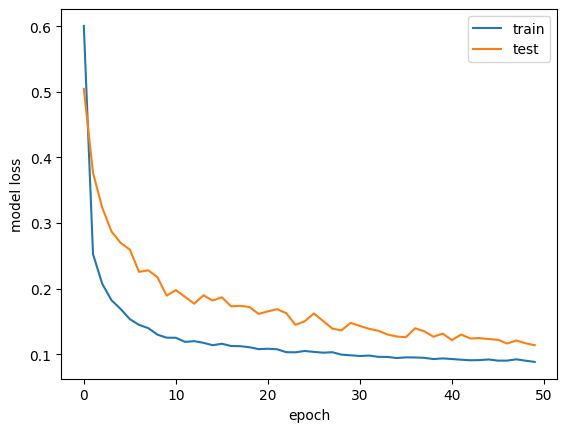

In [ ]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 2s 5ms/step


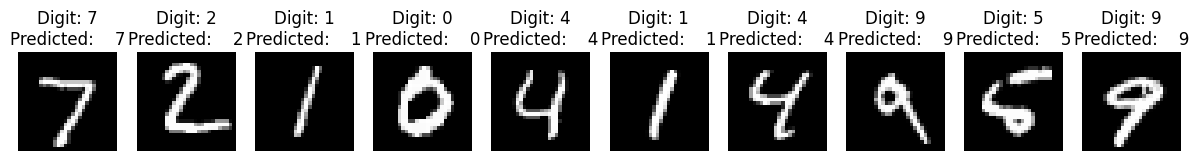

In [ ]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off')
plt.show()

# Exercise 12.3

In this exercise we compare the prediction abilities of our best DNN and the CNN on images of digits that are not in the MNIST database, thus completely new.  
We test them with the images of the $4$ and $6$ digits. The former, because the author writes $4$ very poorly and the latter because the digit is not centered, while all MNIST images are.  
This reveals a weakness of the training process, that is that the network does not recognize digits that are not centered in the image, as it has seen only centered images

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image size: 28x28


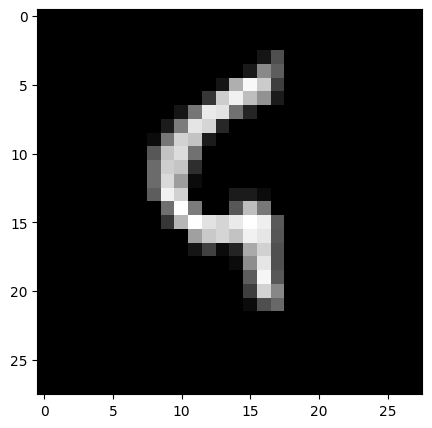

(28, 28)
Image size: 28x28


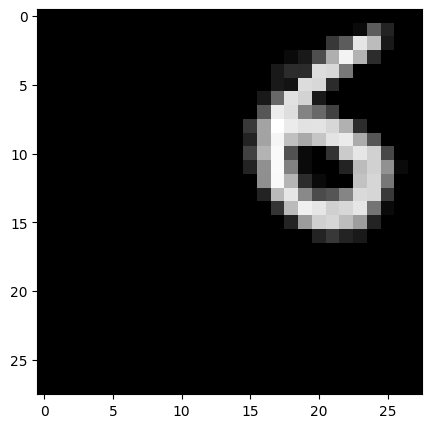

(28, 28)


In [ ]:
from PIL import Image
import os
from google.colab import drive
drive.mount('/content/drive')

digit_filename = "/content/drive/My Drive/Esercitazione_12/four.png" #TO USE INSIDE GOOGLE COLAB
#digit_filename = "four.png" #TO USE OUTSIDE GOOGLE COLAB
#digit_in = Image.open(digit_filename).convert('L')
digit_in = Image.open(digit_filename).convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data1 = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data1[i,j]=pix[j,i]

data1 /= 255

plt.figure(figsize=(5,5))
plt.imshow(data1, cmap='gray')
plt.show()

print(data1.shape)
#print(data)

digit_filename = "/content/drive/My Drive/Esercitazione_12/six.png" #TO USE INSIDE GOOGLE COLAB
#digit_filename = "six.png" #TO USE OUTSIDE GOOGLE COLAB
#digit_in = Image.open(digit_filename).convert('L')
digit_in = Image.open(digit_filename).convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data2 = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data2[i,j]=pix[j,i]

data2 /= 255

plt.figure(figsize=(5,5))
plt.imshow(data2, cmap='gray')
plt.show()

print(data2.shape)
#print(data)

## Result of DNN

(28, 28)
(1, 784)
1/1 [==============================] - 0s 40ms/step


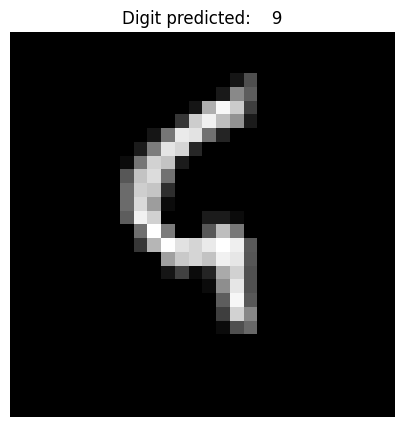

(28, 28)
(1, 784)
1/1 [==============================] - 0s 62ms/step


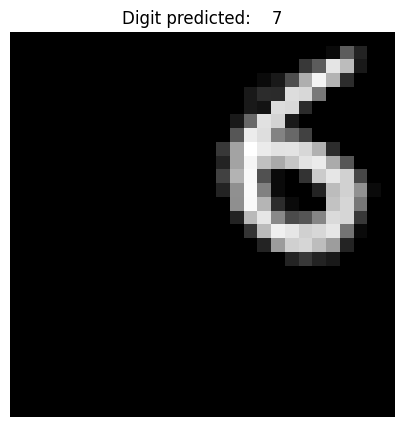

In [ ]:
print(data1.shape)
data1 = data1.reshape(1,xdim*ydim)
print(data1.shape)
pred_0 = model_DNN.predict(data1)

data1 = data1.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))
plt.imshow(data1, cmap='gray')
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off')
plt.show()

print(data2.shape)
data2 = data2.reshape(1,xdim*ydim)
print(data2.shape)
pred_0 = model_DNN.predict(data2)

data2 = data2.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))
plt.imshow(data2, cmap='gray')
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off')
plt.show()

The simple deep neural network fails both in recognizing the ugly $4$ and the decentered $6$.

## Result of CNN

(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 39ms/step


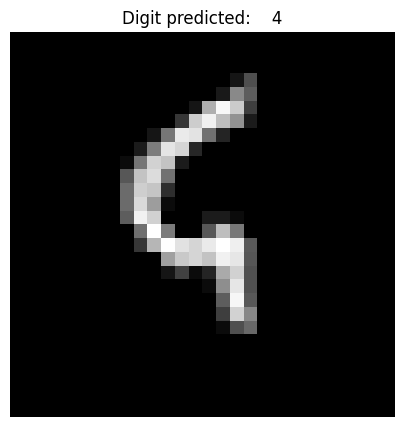

(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 36ms/step


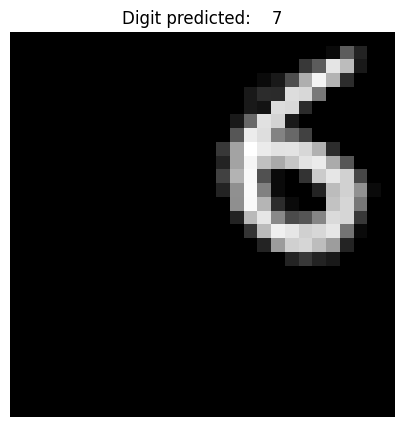

In [ ]:
print(data1.shape)
data1 = data1.reshape(1, xdim,ydim, 1)
#print(data1)
print(data1.shape)
pred_0 = model_CNN.predict(data1)

data1 = data1.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))
plt.imshow(data1, cmap='gray')
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off')
plt.show()

print(data2.shape)
data2 = data2.reshape(1, xdim,ydim, 1)
#print(data2)
print(data2.shape)
pred_0 = model_CNN.predict(data2)

data2 = data2.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))
plt.imshow(data2, cmap='gray')
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off')
plt.show()

As we can see, the convolutional neural network is more flexible and is able to recognize a poorly written $4$, but it is still unable to tell a slightly decentered $6$ apart from a $7$.